In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn import metrics

np.random.seed(0)

In [2]:
data = pd.read_csv('Telco.csv')
data.head(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes


In [3]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Handle missing values and change the data type for TotalCharges
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan).astype(float)

In [6]:
data['TotalCharges'].dtype

dtype('float64')

## Transform Continuous Variables

+ TotalCharges

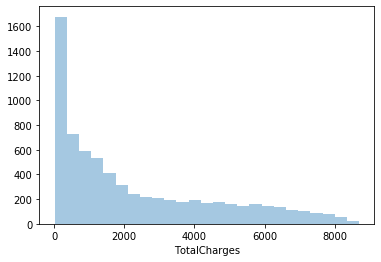

In [7]:
# Plot distribution
sns.distplot(data['TotalCharges'], kde=False)

In [8]:
data['TotalCharges'] = np.log(data['TotalCharges'])
data['TotalCharges'].head(7)

0    3.396185
1    7.544068
2    4.683519
3    7.517928
4    5.021575
5    6.709914
6    7.575277
Name: TotalCharges, dtype: float64

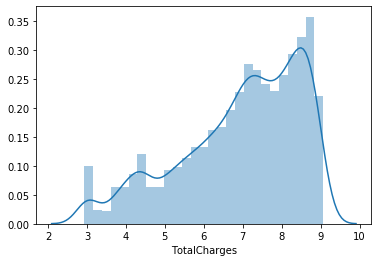

In [9]:
sns.distplot(data['TotalCharges'])

In [10]:
# Variance & Standard Deviation
data['TotalCharges']  = (data['TotalCharges'] - data['TotalCharges'].mean()) / data['TotalCharges'].std()

In [11]:
data['TotalCharges'].head(7)

0   -2.281382
1    0.389269
2   -1.452520
3    0.372439
4   -1.234860
5   -0.147808
6    0.409363
Name: TotalCharges, dtype: float64

In [12]:
# sns.histplot(data['TotalCharges'])

+ MonthlyCharges

In [13]:
# sns.histplot(data['MonthlyCharges'])

In [14]:
data['MonthlyCharges'] = np.log(data['MonthlyCharges'])

In [15]:
# sns.histplot(data['MonthlyCharges'])

In [16]:
data['MonthlyCharges'] = (data['MonthlyCharges'] - data['MonthlyCharges'].mean()) / data['MonthlyCharges'].std()
data['MonthlyCharges'].head()

0   -1.052670
1    0.034077
2   -0.060083
3   -0.466216
4    0.397911
Name: MonthlyCharges, dtype: float64

In [17]:
# sns.histplot(data['MonthlyCharges'])

>> Tenure

In [18]:
data['tenure'].head()

0     1
1    34
2     2
3    45
4     2
Name: tenure, dtype: int64

In [19]:
# sns.histplot(data['tenure'])

In [20]:
data['tenure'] = (data['tenure'] - data['tenure'].mean()) / data['tenure'].std()

In [21]:
data['tenure'].head()

0   -1.277354
1    0.066323
2   -1.236636
3    0.514215
4   -1.236636
Name: tenure, dtype: float64

In [22]:
# sns.histplot(data['tenure'])

In [23]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,-1.277354,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,-1.052670,-2.281382,No
1,5575-GNVDE,Male,0,No,No,0.066323,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,0.034077,0.389269,No
2,3668-QPYBK,Male,0,No,No,-1.236636,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,-0.060083,-1.452520,Yes
3,7795-CFOCW,Male,0,No,No,0.514215,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.466216,0.372439,No
4,9237-HQITU,Female,0,No,No,-1.236636,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.397911,-1.234860,Yes


In [24]:
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [25]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,-1.277354,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,-1.052670,-2.281382,0
1,5575-GNVDE,Male,0,No,No,0.066323,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,0.034077,0.389269,0
2,3668-QPYBK,Male,0,No,No,-1.236636,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,-0.060083,-1.452520,1
3,7795-CFOCW,Male,0,No,No,0.514215,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.466216,0.372439,0
4,9237-HQITU,Female,0,No,No,-1.236636,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.397911,-1.234860,1


In [26]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [27]:
data.dropna(inplace=True)

In [28]:
y = data.Churn
features = data.drop('Churn', axis=1)
features.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [29]:
num_data = features.select_dtypes(exclude='object')
num_data.head(10)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,-1.277354,-1.052670,-2.281382
1,0,0.066323,0.034077,0.389269
2,0,-1.236636,-0.060083,-1.452520
3,0,0.514215,-0.466216,0.372439
4,0,-1.236636,0.397911,-1.234860
5,0,-0.992332,0.975308,-0.147808
6,0,-0.422287,0.787050,0.409363
7,0,-0.910897,-1.058315,-0.791550
8,0,-0.177982,1.060078,0.696733
9,0,1.206412,0.010278,0.783956


In [30]:
data.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [31]:
cat_data = features.select_dtypes('object')
cat_data.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [32]:
cat_data.nunique()

customerID          7032
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
dtype: int64

In [33]:
num_cols = num_data.columns.tolist()
num_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [34]:
cat_cols = []
for col in cat_data.columns:
    if cat_data[col].nunique() < 10:
        cat_cols.append(col)
        
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [35]:
new_features = data[cat_cols].join(data[num_cols])
new_features.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0,-1.277354,-1.052670,-2.281382
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0,0.066323,0.034077,0.389269
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0,-1.236636,-0.060083,-1.452520
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0,0.514215,-0.466216,0.372439
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0,-1.236636,0.397911,-1.234860


In [36]:
encoder = LabelEncoder()

In [37]:
enc_cat = features[cat_cols].apply(encoder.fit_transform)

In [38]:
X = enc_cat.join(features[num_cols])
X.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,-1.277354,-1.052670,-2.281382
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0.066323,0.034077,0.389269
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,0,-1.236636,-0.060083,-1.452520
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0.514215,-0.466216,0.372439
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0,-1.236636,0.397911,-1.234860


In [39]:
X.isnull().sum()

gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
SeniorCitizen       0
tenure              0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [40]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.22, random_state=11)

## DecisionTreeClassifier

In [80]:
model_dt = DecisionTreeClassifier(random_state=0)

In [81]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [82]:
preds_dt = model_dt.predict(X_valid)
score = metrics.roc_auc_score(preds_dt, y_valid)
print('DecisionTreeClassifier')
print('>> ', score)

DecisionTreeClassifier
>>  0.641945880615054


## RandomForestClassifier

In [77]:
model_rf = RandomForestClassifier(n_estimators=370, random_state=0)

In [78]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=370,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [79]:
preds_rf = model_rf.predict(X_valid)
score = metrics.roc_auc_score(preds_rf, y_valid)
print('RandomForestClassifier')
print('>> ', score)

RandomForestClassifier
>>  0.7171231507397041


## KNeighborsClassifier

In [65]:
model_knn = KNeighborsClassifier(n_neighbors=7)

In [66]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [67]:
preds_knn = model_knn.predict(X_valid)
score = metrics.roc_auc_score(preds_knn, y_valid)
print('KNeighborsClassifier')
print('>> ', score)

KNeighborsClassifier
>>  0.6926169859985261


## SupportVectorClassifier

In [50]:
model_svc = SVC(random_state=0)

In [51]:
model_svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [52]:
preds_svc = model_svc.predict(X_valid)
score = metrics.roc_auc_score(preds_svc, y_valid)
print('SupportVectorClassifier')
print('>> ', score)

SupportVectorClassifier
>>  0.7208809415623996


# XGBoost